In [1]:
import pandas as pd
import numpy as np
%matplotlib  inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
PD_DF = pd.read_csv('parkinsons.data')

In [3]:
PD_DF

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
PD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [5]:
PD_DF.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [4]:
# More records towards PD Diseases impacted. Class imbalance visible for the data.

PD_DF.groupby('status').count()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [5]:
# NO MIssing Values
PD_DF[PD_DF.isnull() == True]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# DT does not take in the object types Variables. Hence converted to categorical and assigned code.
PD_DF['name'] = pd.Categorical(PD_DF['name']).codes

In [7]:
# Finding outliers in the dataset. There are Higher OLs and long tails visible for MDVP:Fhi(Hz) and MDVP:Flo(Hz).
IQR = PD_DF.quantile(0.75) - PD_DF.quantile(0.25) 
print ('Lower outliers' '\n', PD_DF.quantile(0.25) - (1.5 * IQR ))
print ('\n')
print ('Higher outliers' '\n',PD_DF.quantile(0.75) + (1.5 * IQR ))  

print (PD_DF[PD_DF['MDVP:Fhi(Hz)'] > 358.220000])
print (PD_DF[PD_DF['MDVP:Flo(Hz)'] > 223.609750])



Lower outliers
 name               -97.000000
MDVP:Fo(Hz)         19.776500
MDVP:Fhi(Hz)         0.848000
MDVP:Flo(Hz)         0.699750
MDVP:Jitter(%)      -0.002397
MDVP:Jitter(Abs)    -0.000040
MDVP:RAP            -0.001602
MDVP:PPQ            -0.001283
Jitter:DDP          -0.004795
MDVP:Shimmer        -0.015565
MDVP:Shimmer(dB)    -0.153750
Shimmer:APQ3        -0.009785
Shimmer:APQ5        -0.009620
MDVP:APQ            -0.011400
Shimmer:DDA         -0.029355
NHR                 -0.023648
HNR                 10.381750
status               1.000000
RPDE                 0.171921
DFA                  0.544072
spread1             -8.555952
spread2              0.017025
D2                   1.293130
PPE                 -0.035842
dtype: float64


Higher outliers
 name                291.000000
MDVP:Fo(Hz)         280.564500
MDVP:Fhi(Hz)        358.220000
MDVP:Flo(Hz)        223.609750
MDVP:Jitter(%)        0.013222
MDVP:Jitter(Abs)      0.000120
MDVP:RAP              0.007097
MDVP:PPQ     

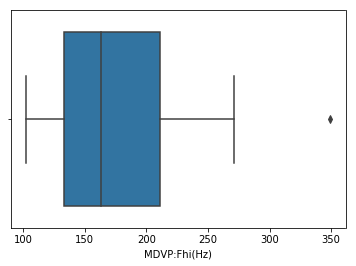

In [13]:
sns.boxplot(PD_DF['MDVP:Fhi(Hz)'])

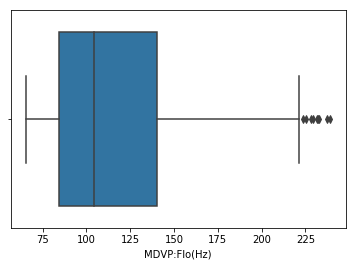

In [8]:
sns.boxplot(PD_DF['MDVP:Flo(Hz)'])

In [9]:
# Drop outliers

PD_DF.drop(PD_DF[PD_DF['MDVP:Fhi(Hz)'] > 358.220000].index,inplace=True)
PD_DF.drop(PD_DF[PD_DF['MDVP:Flo(Hz)'] > 223.609750].index,inplace=True)

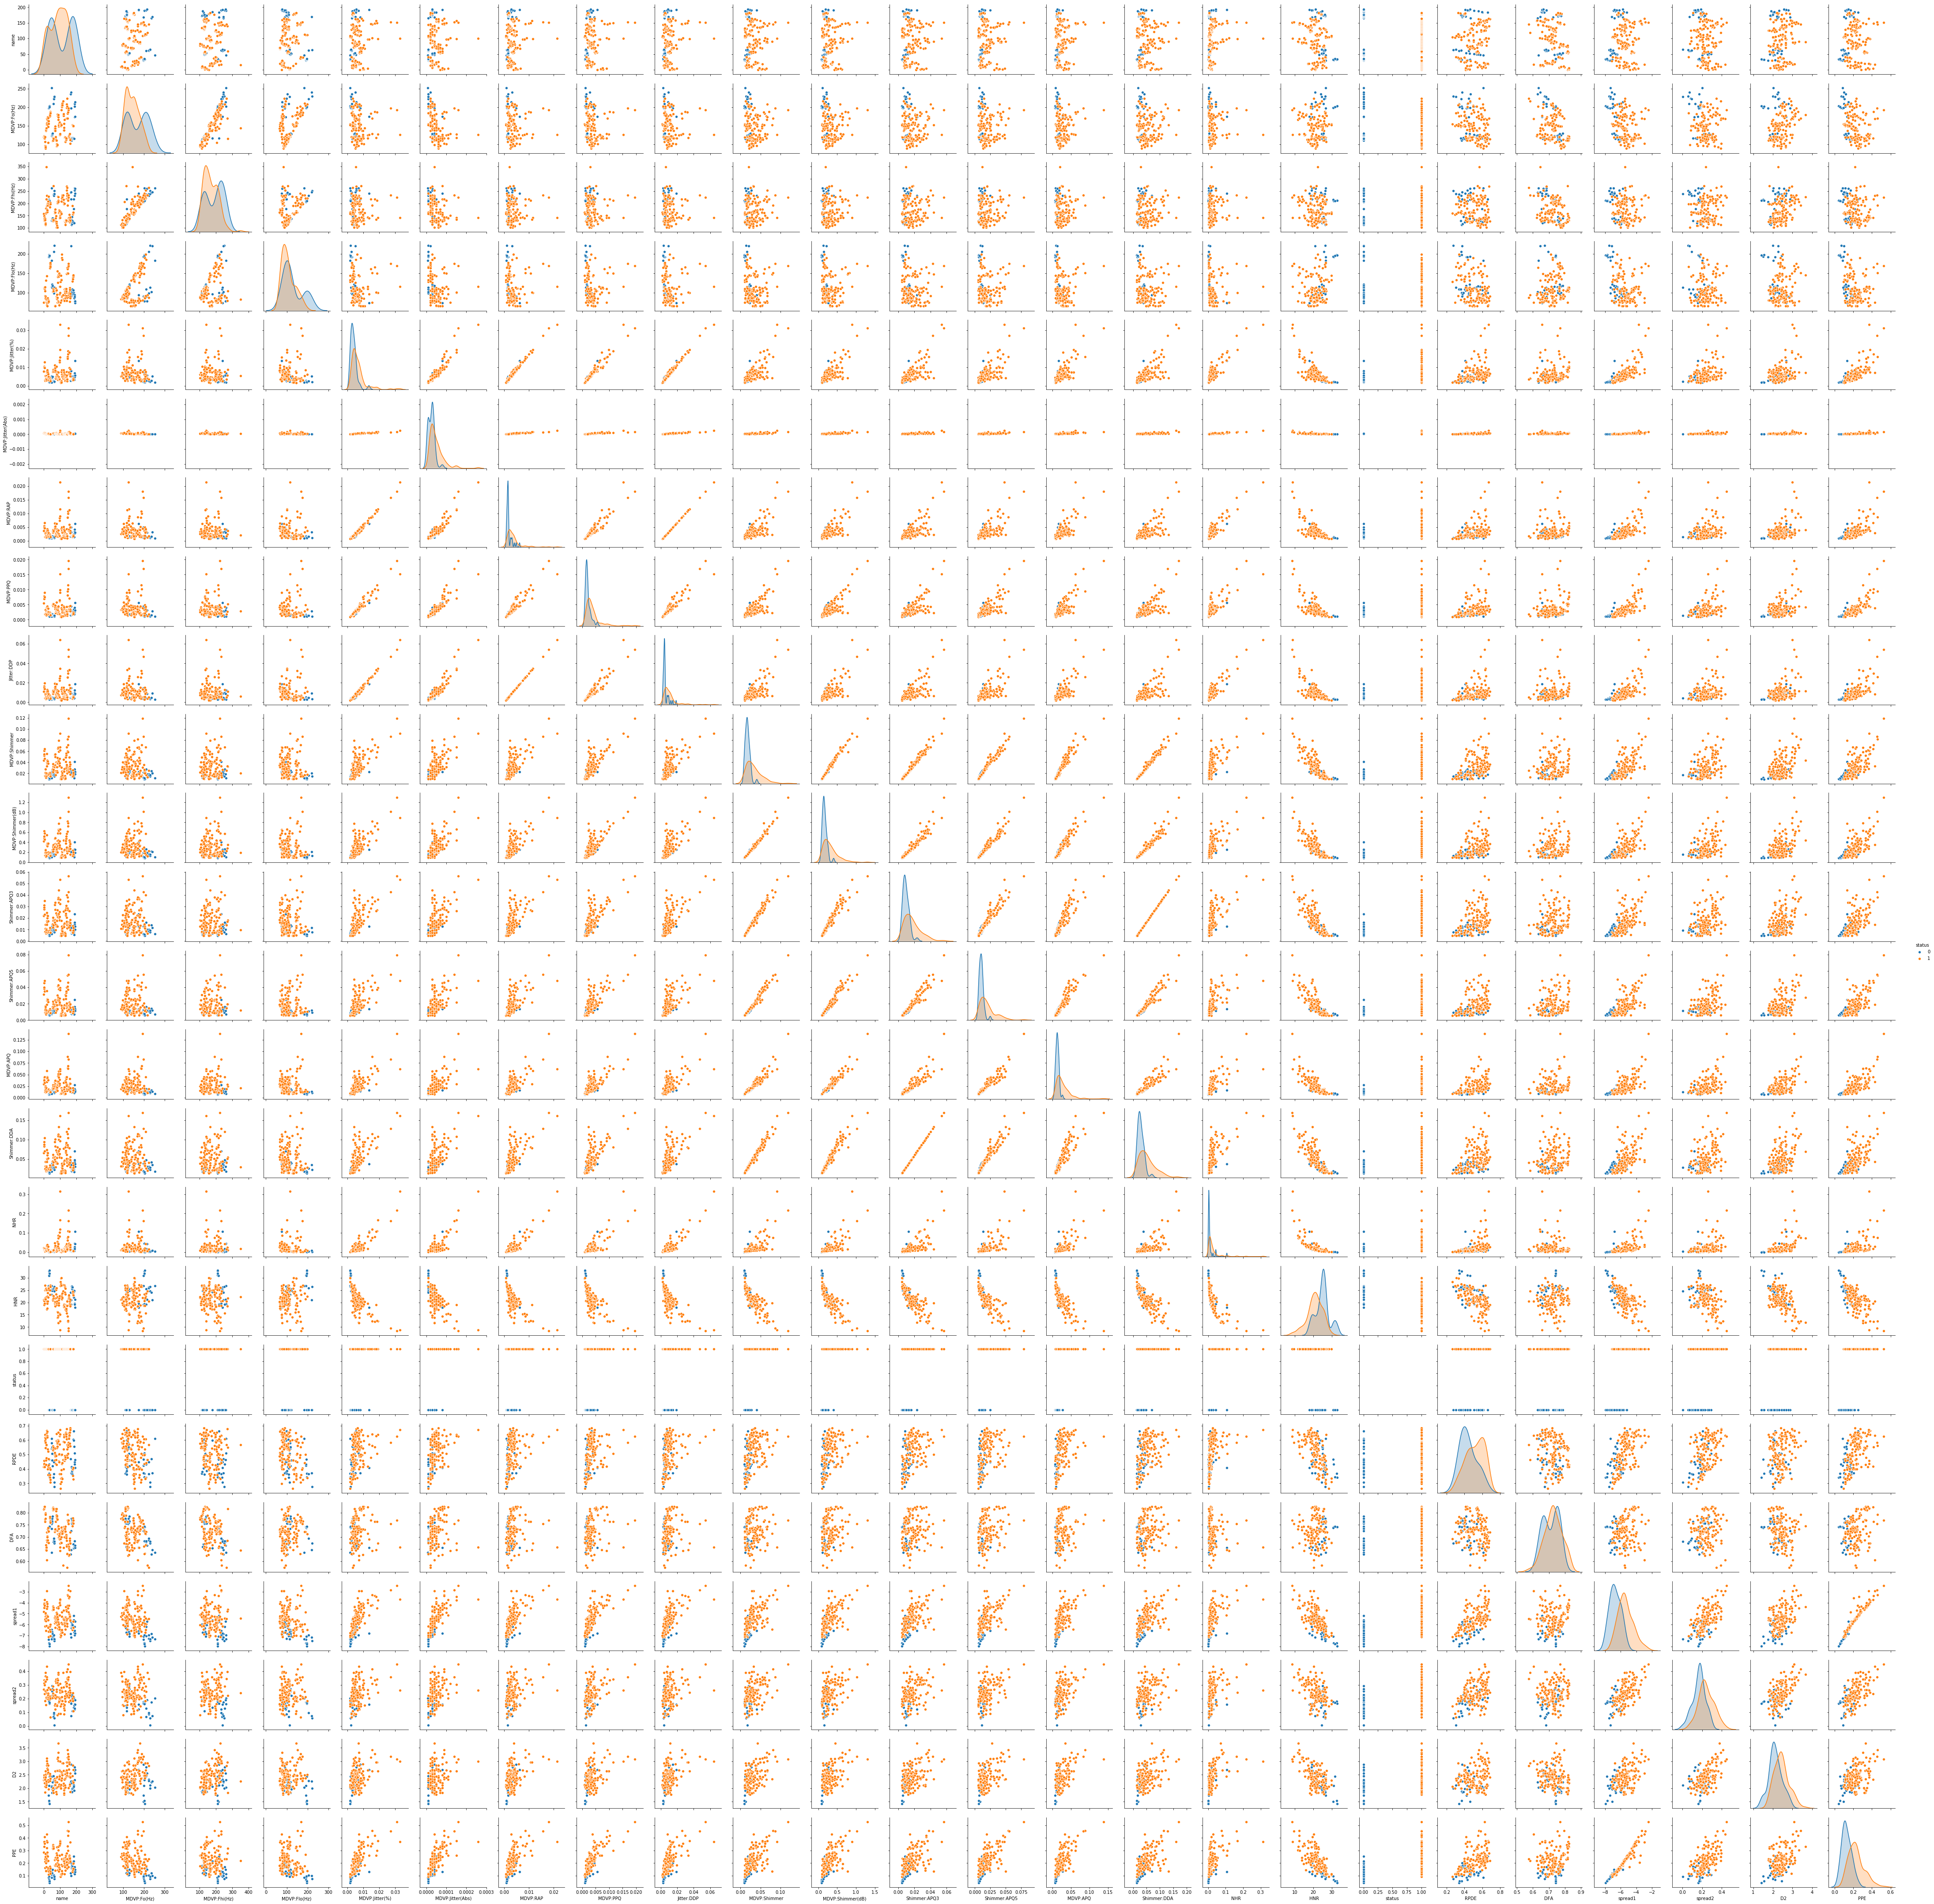

In [101]:
sns.pairplot(data = PD_DF, diag_kind = 'kde', hue = 'status')

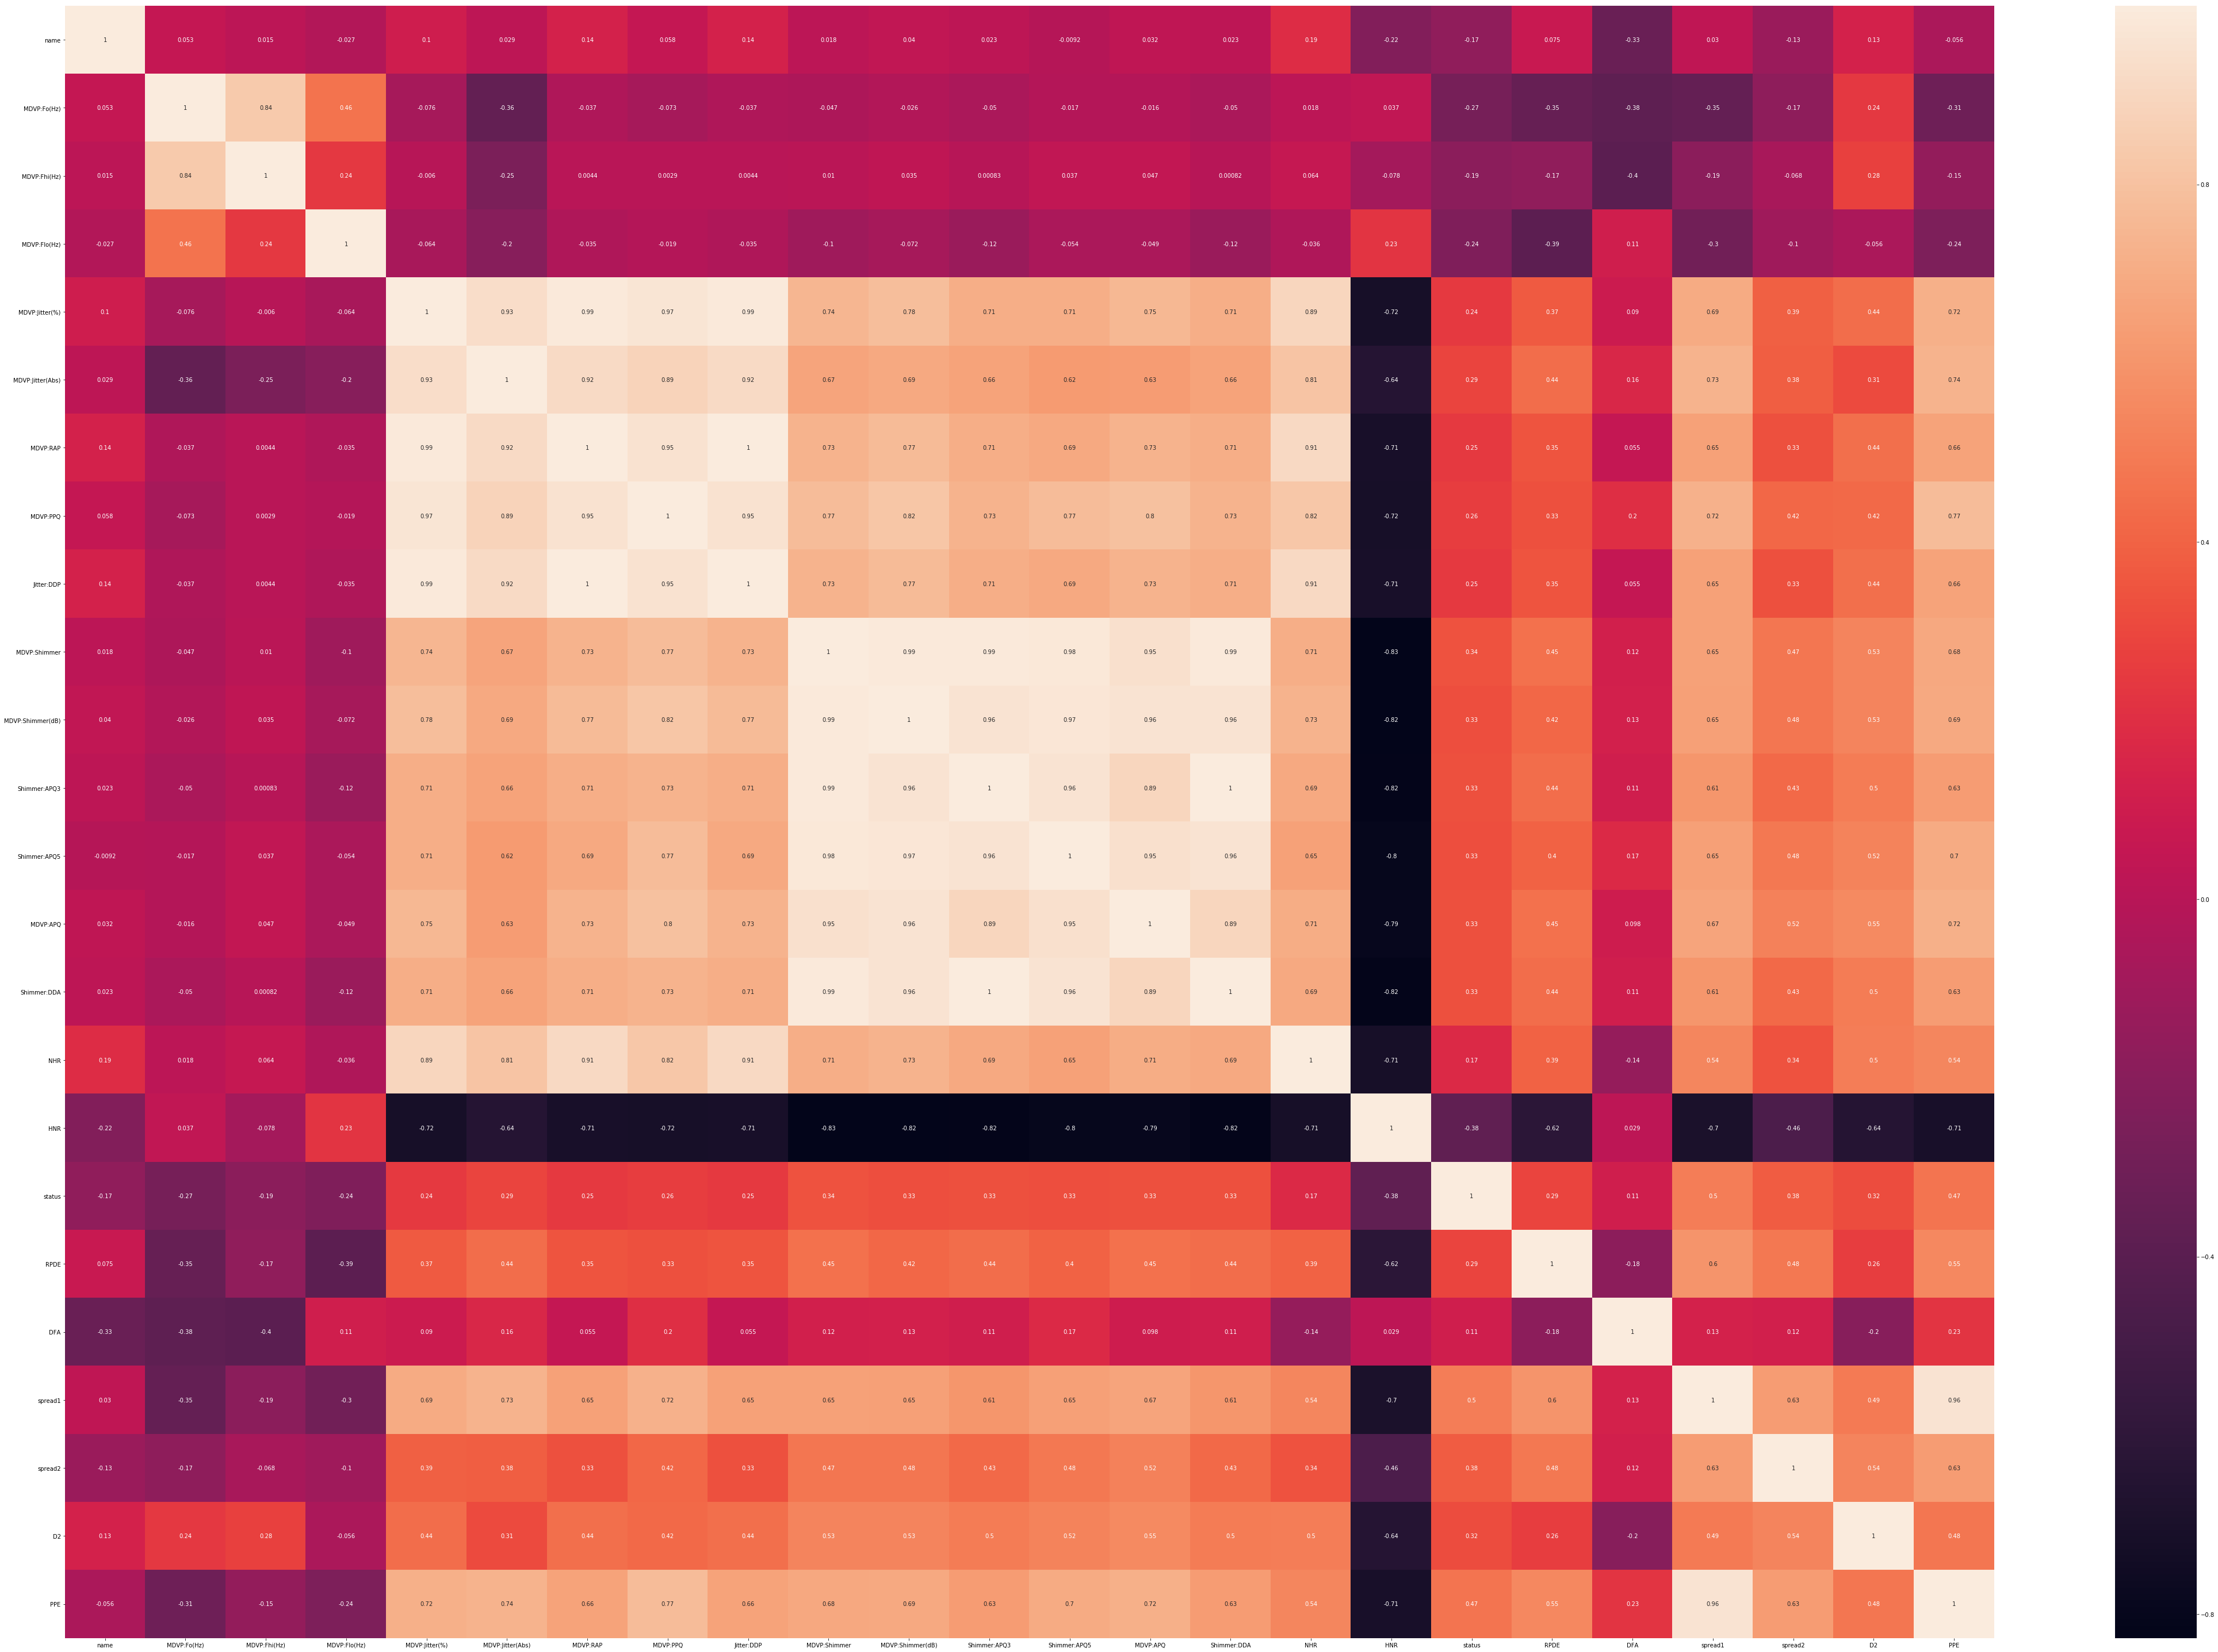

In [13]:
plt.figure(figsize= (60,40))
sns.heatmap(PD_DF.corr(),annot = True)
plt.tight_layout()
plt.show()

In [10]:
X= PD_DF.drop('status', axis =1)
y = PD_DF['status']

In [11]:
#Checking all the rows have numeric values.
PD_DF[~PD_DF.applymap(np.isreal).all(1)]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [12]:
X.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

# OBSERVATIONS

1- There were outliers involved in the DATA SET for MDVP:Fhi(Hz)' and MDVP:Flo(Hz) which were detected by boxplot and dropped.

2- Diagonals in Pair plot shows that Central values are NOT exactly matching but they are still overlapping hence there are some weak predictors which can be considered in DT

3- Looking at the correlation there are multiple variables which are very strong correlation among themselves for ex:
MDVP.Fo(HZ) and MDVP.FHi(Hz) are very strongly related among each other hence taking one of them only during model building will help.



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [44]:
DC = DecisionTreeClassifier(criterion='entropy', random_state= 1)

In [45]:
DC.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [69]:
predict = DC.predict(X_test)

In [48]:
# First validating on validation set so that it does not see over my test set size.

DC.score(X_val,y_val)

0.9642857142857143

In [56]:
DC.score(X_train,y_train)

1.0

From the above results it is likely that model is over fit hence it is needed to be regularized. DTs will be regularized by tuning the hyperparameters.


Regualizaing DT using RandomSearchCV

In [59]:
# Gridsearch for hyperparameters tuning and finding best params.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [60]:
parameters = {"max_depth": [1,2,3,4,5,6,7,8],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1,2,3,4,5],
             'min_samples_split' : [2, 5, 10]}

In [61]:
randomCV = RandomizedSearchCV(estimator=DC,param_distributions = parameters, cv = 3,n_iter = 10, random_state= 1)
randomCV.fit(X_train,y_train)

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [62]:
randomCV.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [64]:
DC_model = DecisionTreeClassifier(criterion='entropy', random_state= 1, max_depth= 4,min_samples_leaf=2,min_samples_split=2)
DC_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [65]:
DC_model.score(X_test,y_test)

1.0

In [66]:
DC_model.score(X_train,y_train)

0.9821428571428571

In [67]:
from sklearn.metrics import confusion_matrix,classification_report
from pandas_ml import ConfusionMatrix

In [70]:
cm = ConfusionMatrix(y_test,predict)

In [71]:
cm

Predicted  False  True  __all__
Actual                         
False          1     1        2
True           3     5        8
__all__        4     6       10

In [73]:
cm.print_stats()

population: 10
P: 8
N: 2
PositiveTest: 6
NegativeTest: 4
TP: 5
TN: 1
FP: 1
FN: 3
TPR: 0.625
TNR: 0.5
PPV: 0.8333333333333334
NPV: 0.25
FPR: 0.5
FDR: 0.16666666666666666
FNR: 0.375
ACC: 0.6
F1_score: 0.7142857142857143
MCC: 0.10206207261596577
informedness: 0.125
markedness: 0.08333333333333348
prevalence: 0.8
LRP: 1.25
LRN: 0.75
DOR: 1.6666666666666667
FOR: 0.75


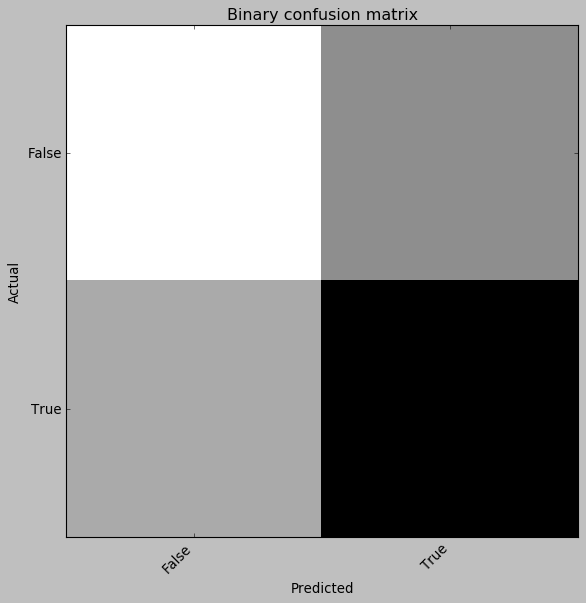

In [33]:
cm.plot()
plt.show()

In [74]:
print (confusion_matrix(y_test, predict))
print (classification_report(y_test, predict))

[[ 9  0]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.96      0.98        26

   micro avg       0.97      0.97      0.97        35
   macro avg       0.95      0.98      0.96        35
weighted avg       0.97      0.97      0.97        35



In [37]:
pd.crosstab(y_test,predict)

col_0,0,1
Actual,,
0,10,1
1,3,39


In [38]:
#  Class level accuracy for Parkinson Disease labelled as 1 has precision level 100% and recall is 96% which is relatively good model

#Using Regularization parameters we can see the overfitting model in training set has been reduced. Regularization helps in decresasing the overfitting.


In [176]:
# Implementing Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(random_state= 1,n_estimators= 10)

In [99]:
from pprint import pprint
pprint (rfc.get_params())

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [100]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [101]:
rfc.score(X_test,y_test)

0.8857142857142857

In [ ]:
# Implementing the Random Grid search to optimize the performance

In [102]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [103]:
# Hyperparameter tuning for the above created model

random_rf = RandomizedSearchCV(estimator=rfc,param_distributions = random_grid, cv = 3,n_iter = 10, random_state= 1)               

In [104]:
random_rf.fit(X_train,y_train)

C:\Users\Pmohan\AppData\Local\Continuum\anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [105]:
random_rf.best_params_

{'n_estimators': 115,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [106]:
rfc_model = RandomForestClassifier(random_state= 1,n_estimators= 115,bootstrap = True, max_depth = 50, max_features = 'auto',min_samples_leaf = 1,
 min_samples_split =5)

In [107]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [108]:
rfc_model.score(X_test,y_test)

0.9142857142857143

In [ ]:
# Improvement in score by hyper tuning the parameters on the test data with 98% which is good model.